In [2]:
from mne import read_epochs, set_eeg_reference
from mne.preprocessing import ICA, EOGRegression
import numpy as np
from mne.viz import plot_ica_components
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

Load and Preprocessing

In [25]:
import sys
sys.path.append('../../preprocessing')
from load_data import load_raw_to_epochs, get_channel_types

load_raw_to_epochs('dn.bdf', True)

Extracting EDF parameters from C:\Users\Alberto\Documents\BCI\data\dnn\dn.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5609471  =      0.000 ...  2739.000 secs...
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 13517 samples (6.600 sec)



C:\Users\Alberto\Documents\BCI\data\dnn\../../preprocessing\load_data.py:35: RuntimeWarning: DigMontage is only a subset of info. There are 8 channel positions not present in the DigMontage. The required channels are:

['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw.set_montage(montage, on_missing='warn')
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    8.8s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:   29.1s
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:   30.4s finished


Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
96 events found
Event IDs: [  2   4 130 134 255]
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 96 events and 20481 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1528 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 6508 tasks      | elapsed:    8.7s
[Parallel(n_jobs=8)]: Done 7008 out of 7008 | elapsed:    9.2s finished


Overwriting existing file.
saved


In [26]:
raw = read_epochs('raw_epo.fif')

Reading C:\Users\Alberto\Documents\BCI\data\dnn\raw_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated


Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1528 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 7288 tasks      | elapsed:    7.0s
[Parallel(n_jobs=8)]: Done 8568 out of 8568 | elapsed:    8.1s finished


Using matplotlib as 2D backend.


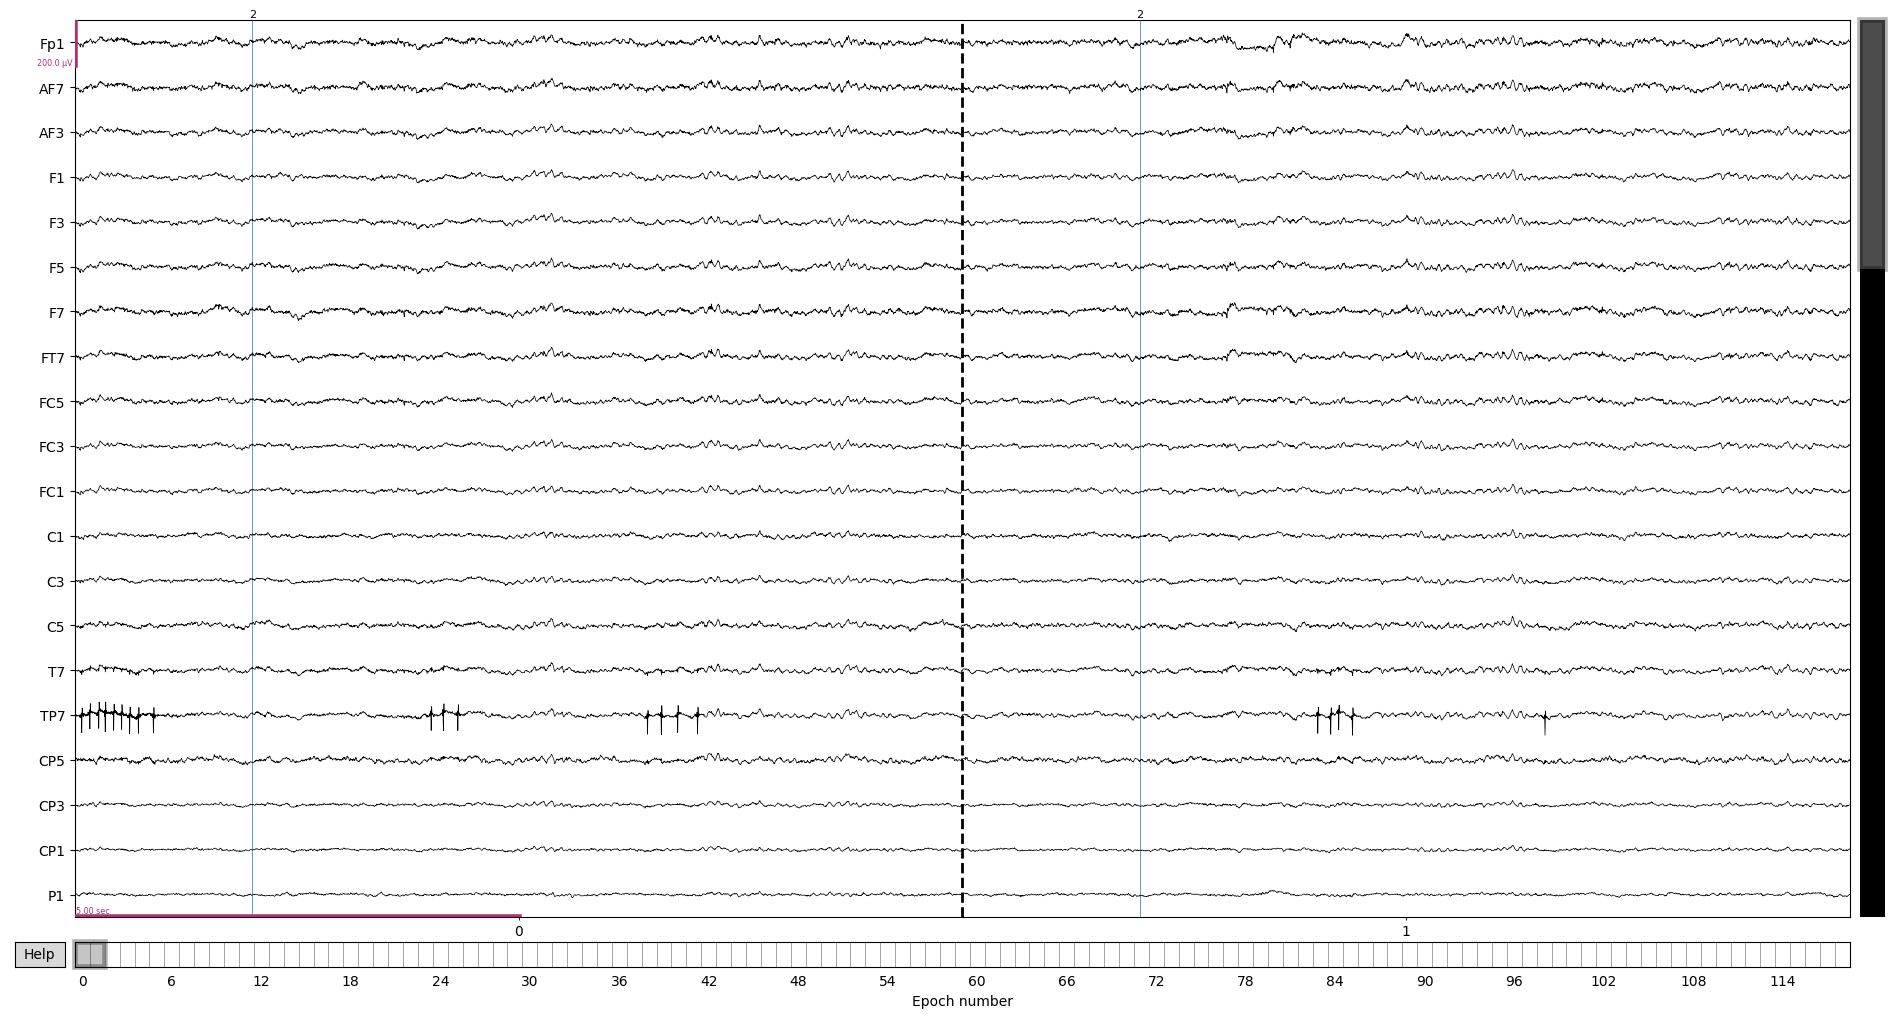

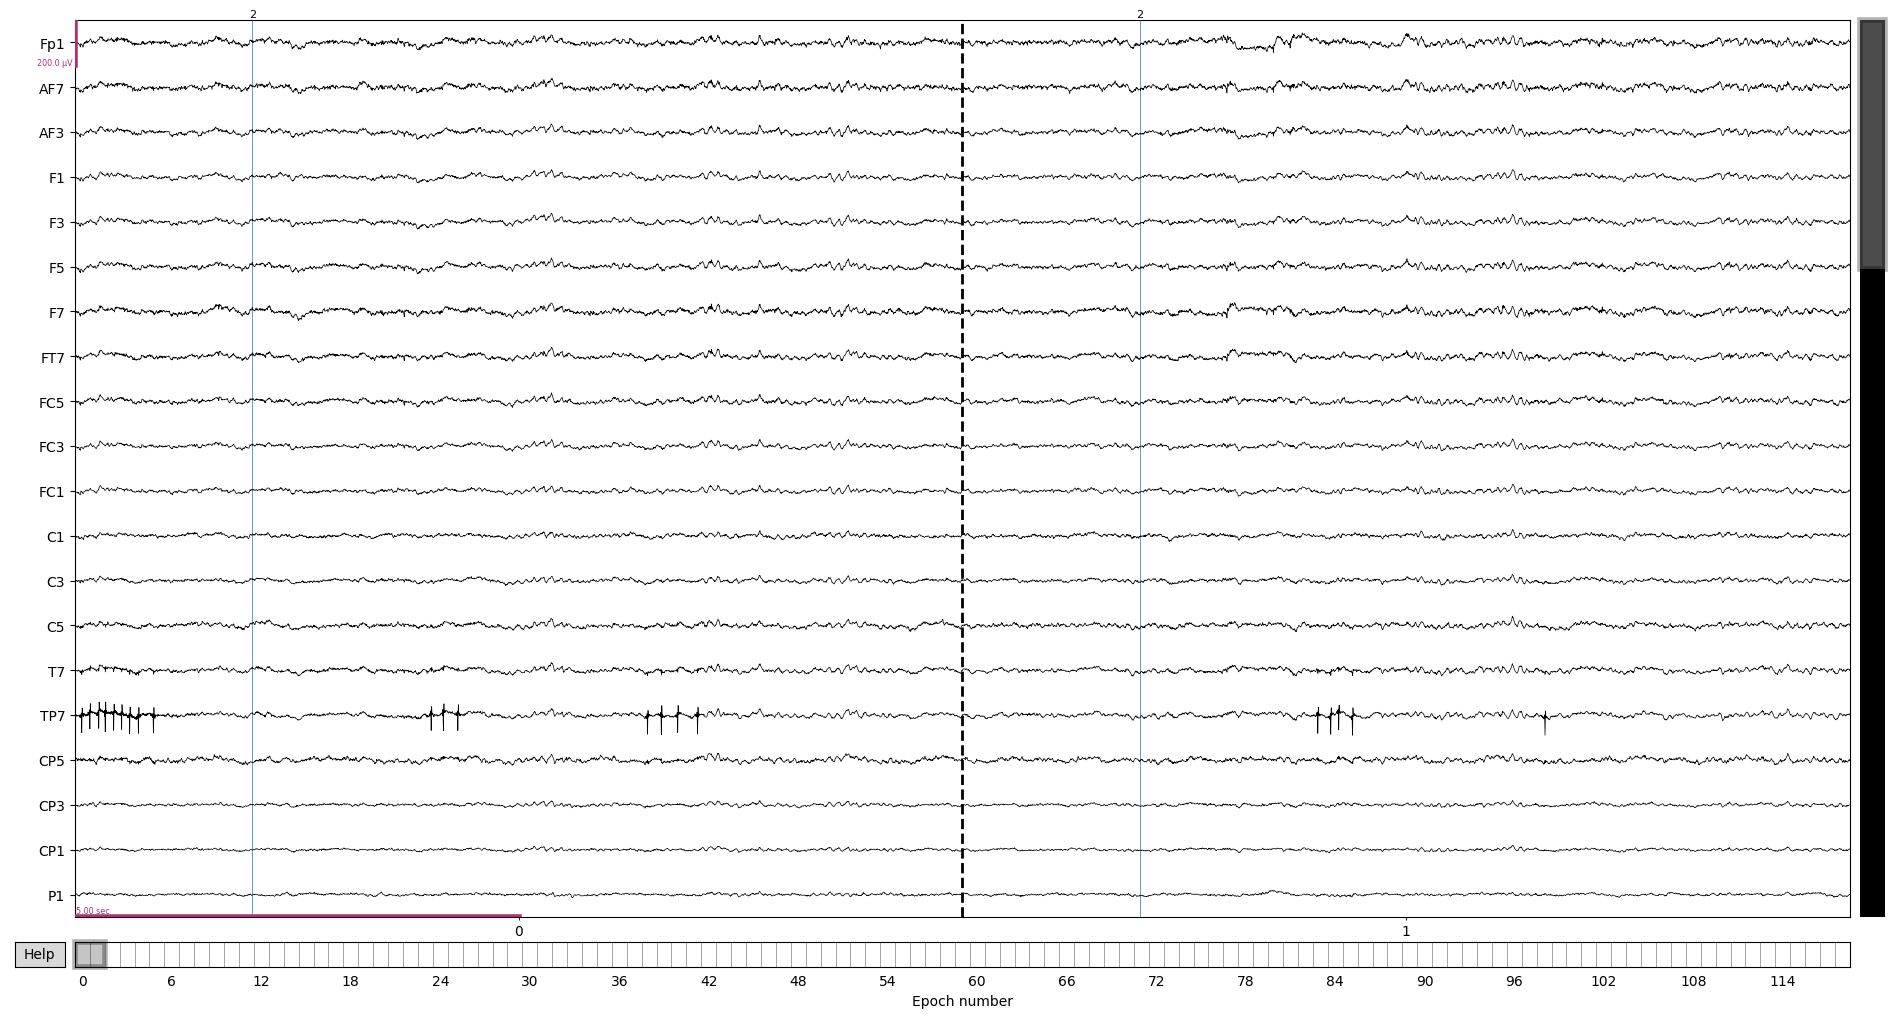

In [4]:
raw.copy().filter(1,120, n_jobs=8).plot(n_channels=20, n_epochs=2, scalings=10e-5, events=raw.events, picks=['eeg','eog'])

Marking bad chanels

In [27]:
bads = [
    'EXG7', 'EXG5', 'P10', 'P8', 'Oz', 'FT8', 'F4', 'F2', 'FC6', 
    'P2','T8','FT8','FT7','C5','F8','CPz','P9','AF8']
raw.info['bads'] = bads

Referencing

In [28]:
referenced = set_eeg_reference(raw,ref_channels='average')[0]
del raw

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


set channel types

In [29]:
referenced.set_channel_types(get_channel_types())

<EpochsFIF |  96 events (all good), -2 - 7.99902 sec, baseline off, ~547.6 MB, data loaded,
 'r_pinch': 20
 'r_stop': 20
 'left': 18
 'right': 22
 'rest': 16>

Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1528 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 6934 tasks      | elapsed:    6.5s
[Parallel(n_jobs=8)]: Done 7616 out of 7616 | elapsed:    7.0s finished


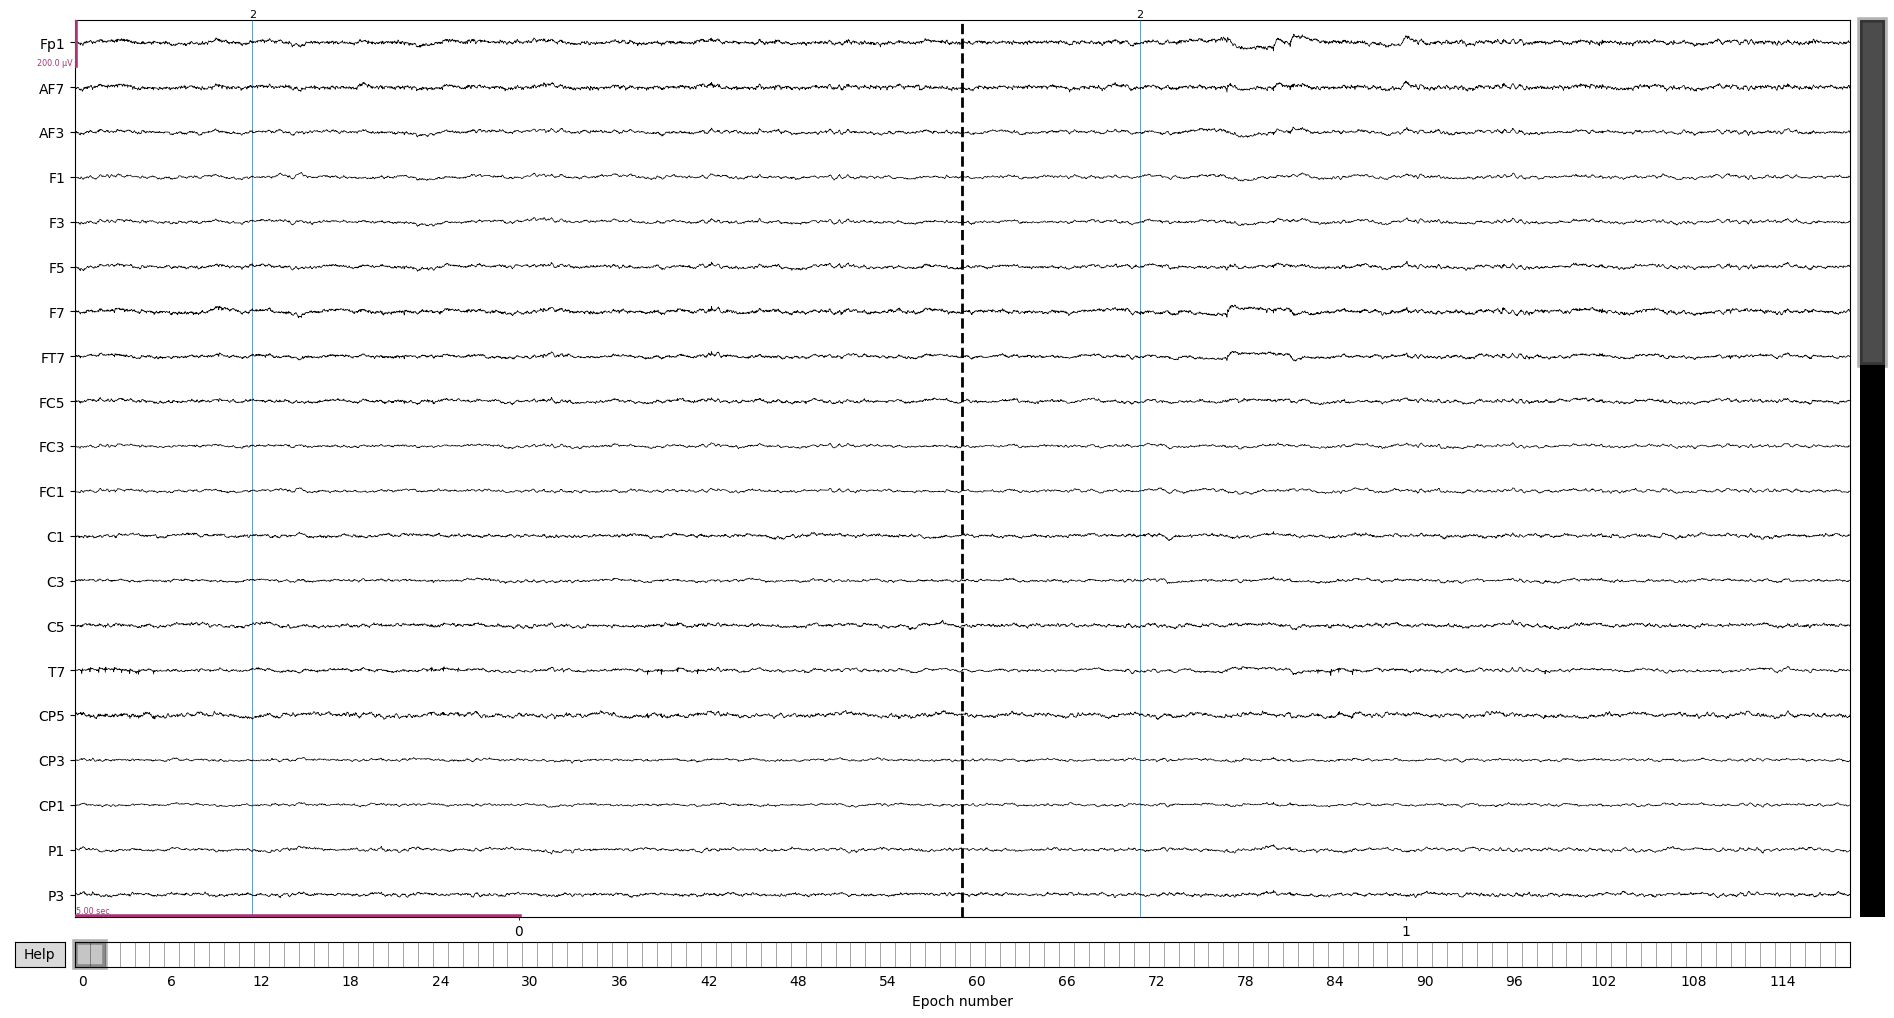

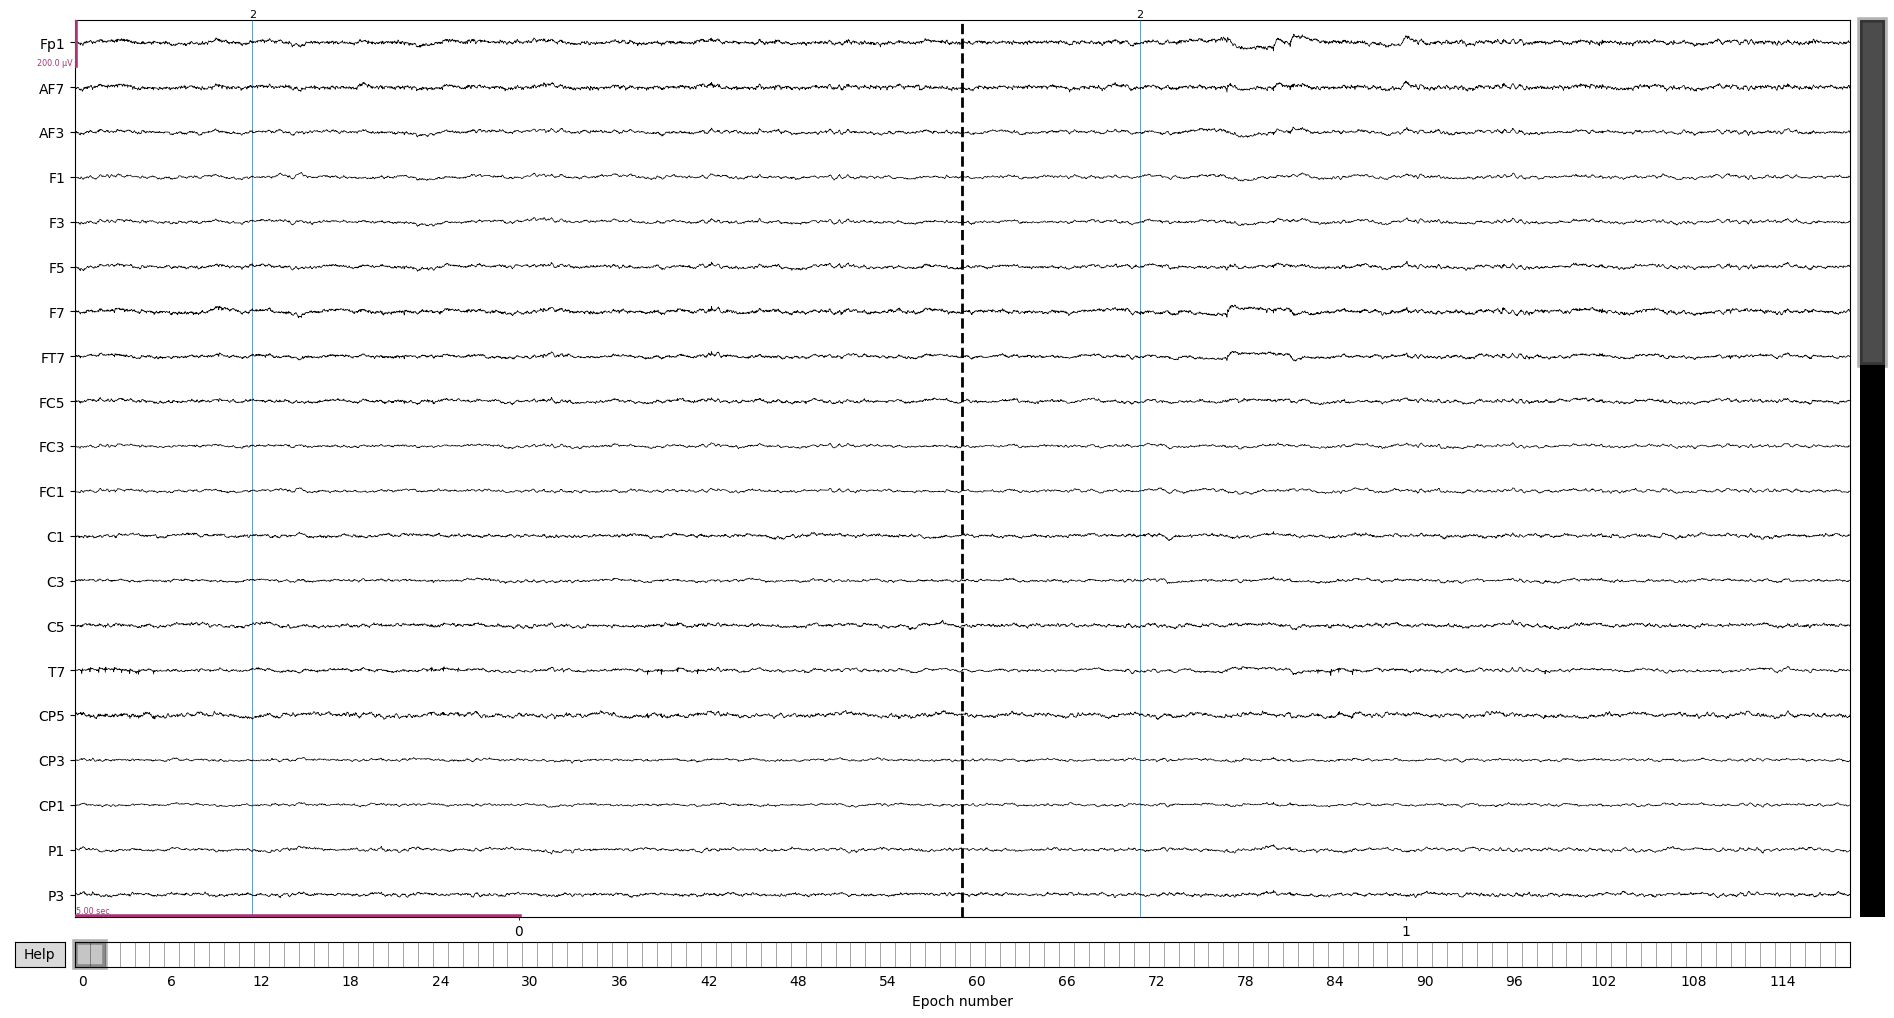

In [8]:
referenced.copy().filter(1,120, n_jobs=8).plot(n_channels=20, n_epochs=2, scalings=10e-6, events=referenced.events, picks=['eeg','eog'])

In [30]:
referenced.save('referenced_epo.fif', overwrite=True)
del referenced

Overwriting existing file.


REMOVE ARTIFACTS


In [42]:
epochs = read_epochs('referenced_epo.fif')
epochs.drop([30, 32, 35, 41, 42, 47, 48, 50, 54, 56, 64, 65, 66, 67, 68, 80, 82, 85,88, 89, 91, 94])

Reading C:\Users\Alberto\Documents\BCI\data\dnn\referenced_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Dropped 22 epochs: 30, 32, 35, 41, 42, 47, 48, 50, 54, 56, 64, 65, 66, 67, 68, 80, 82, 85, 88, 89, 91, 94


<EpochsFIF |  74 events (all good), -2 - 7.99902 sec, baseline off, ~422.1 MB, data loaded,
 'r_pinch': 18
 'r_stop': 16
 'left': 16
 'right': 13
 'rest': 11>

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


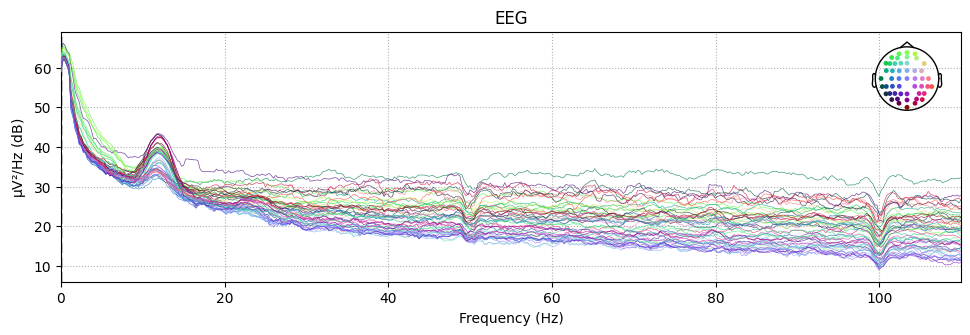

In [32]:
epochs['left'].plot_psd(fmax=110, tmin=0, tmax=4)

Removew EOG by Regression

No projector specified for this dataset. Please consider the method self.add_proj.


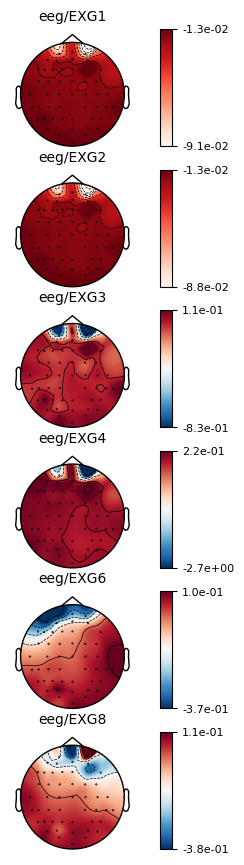

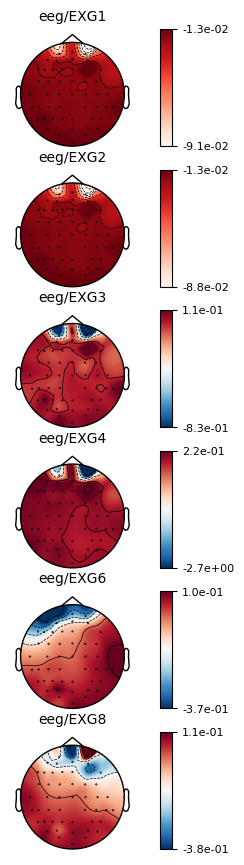

In [43]:
regressor = EOGRegression(
    picks='eeg', picks_artifact=['EXG1','EXG2','EXG3','EXG4','EXG6','EXG8']).fit(epochs)
regressor.plot()

ICA 

In [44]:
filtered = epochs.copy().filter(1,120, n_jobs=8)
filtered.apply_baseline((-1.4,-0.1))
ica = ICA(n_components=10, method='picard')
ica.fit(filtered)

Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    3.9s
[Parallel(n_jobs=8)]: Done 583 tasks      | elapsed:    5.2s
[Parallel(n_jobs=8)]: Done 4453 tasks      | elapsed:   10.3s
[Parallel(n_jobs=8)]: Done 4736 out of 4736 | elapsed:   10.7s finished


Applying baseline correction (mode: mean)
Fitting ICA to data using 49 channels (please be patient, this may take a while)


C:\Users\Alberto\AppData\Local\Temp\ipykernel_6076\1646505415.py:4: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(filtered)


Selecting by number: 10 components
Fitting ICA took 31.6s.


<ICA | epochs decomposition, method: picard (fit in 49 iterations on 757760 samples), 10 ICA components (49 PCA components available), channel types: eeg, no sources marked for exclusion>

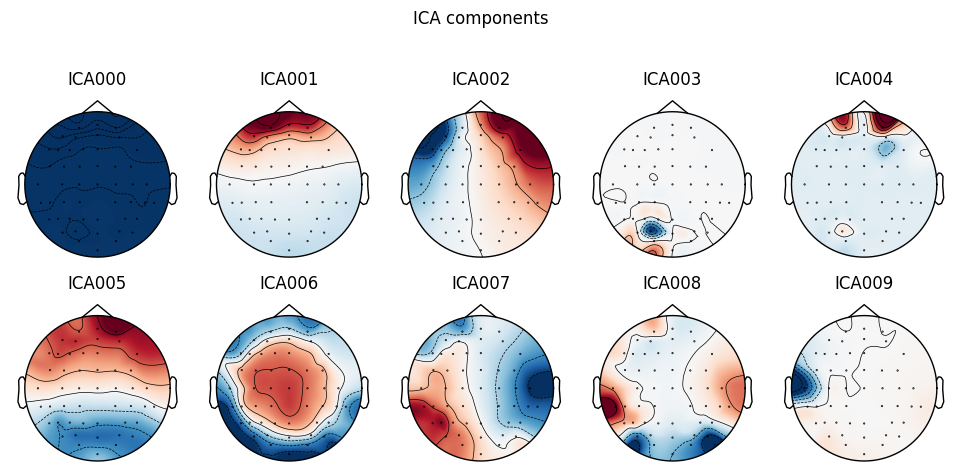

[<MNEFigure size 975x496 with 10 Axes>]

In [45]:
plot_ica_components(ica)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_6076\2050551885.py:2: RuntimeWarning: filter_length (3381) is longer than the signal (2151), distortion is likely. Reduce filter length or filter a longer signal.
  epochs['left','rest'].copy().crop(-0.1,2).filter(1,120, verbose=False),


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
27 matching events found
No baseline correction applied
0 projection i

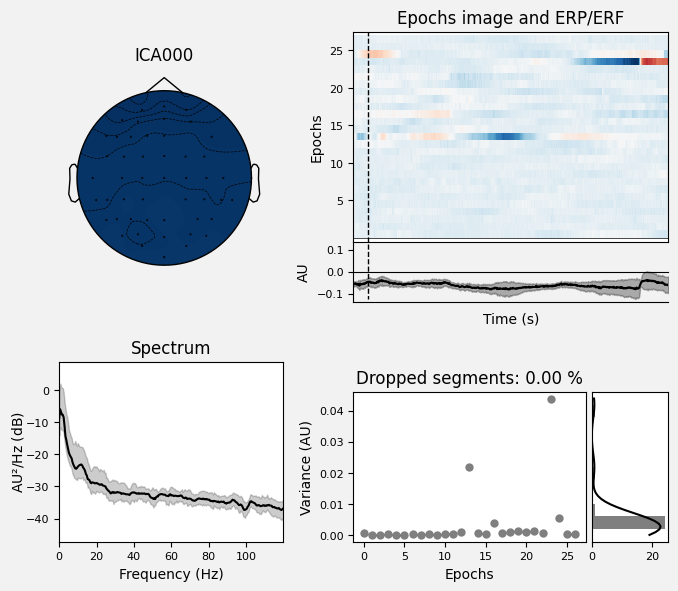

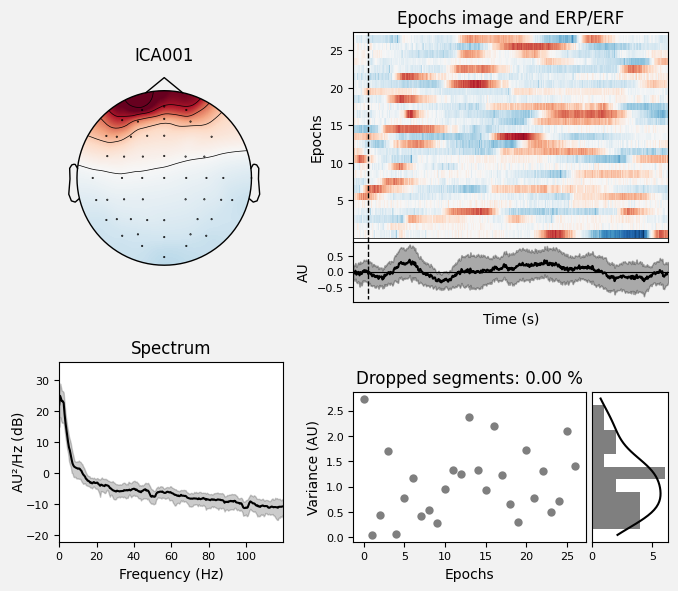

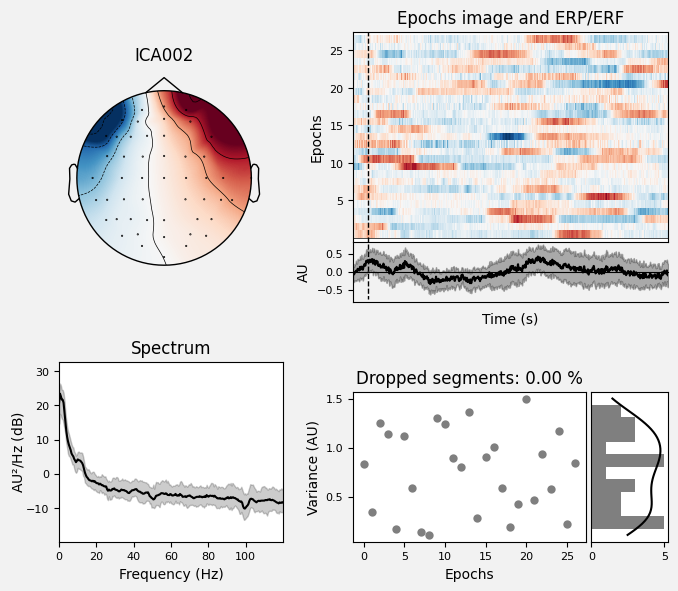

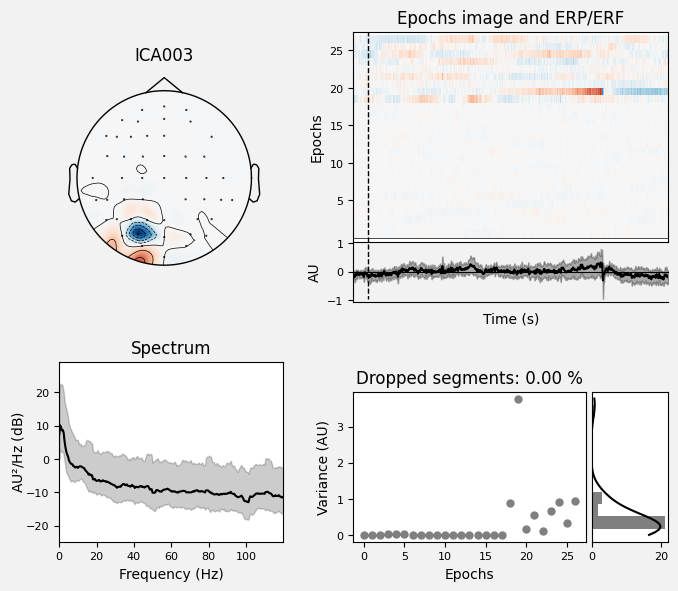

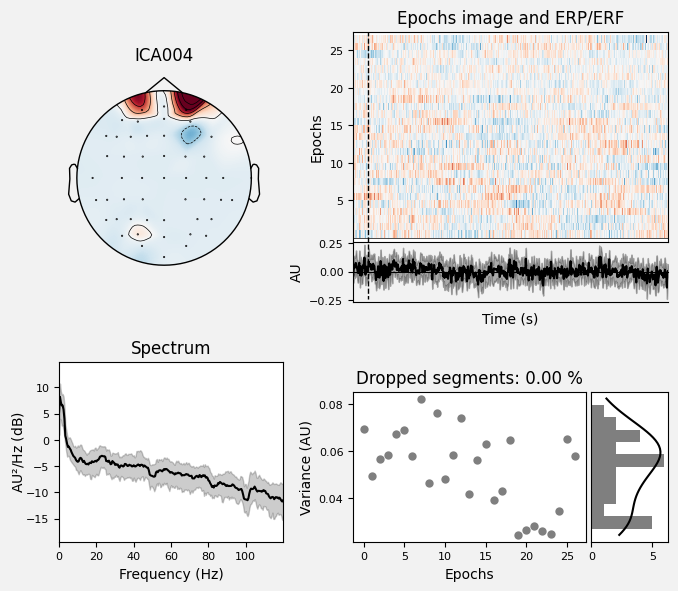

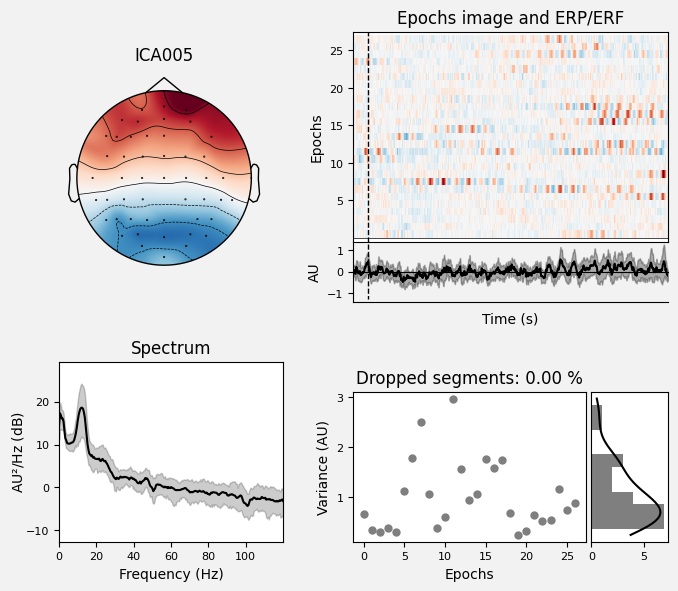

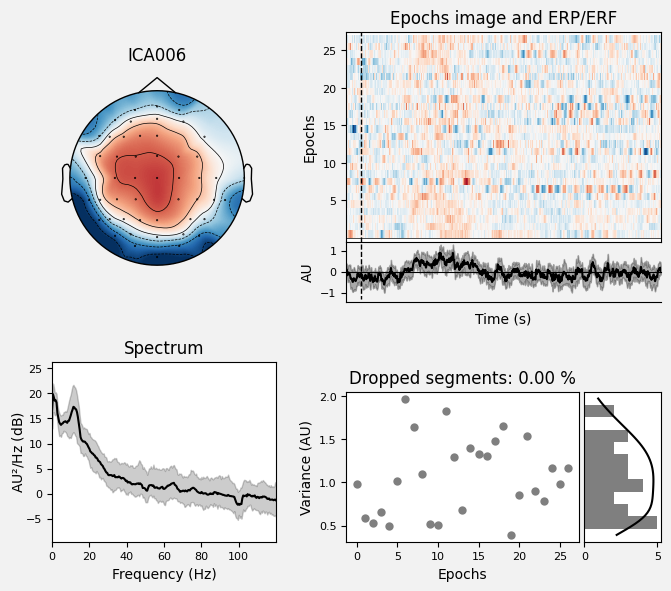

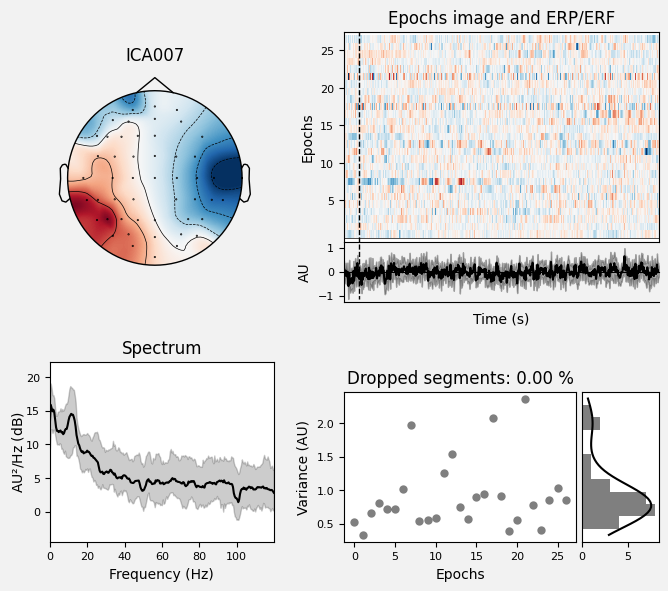

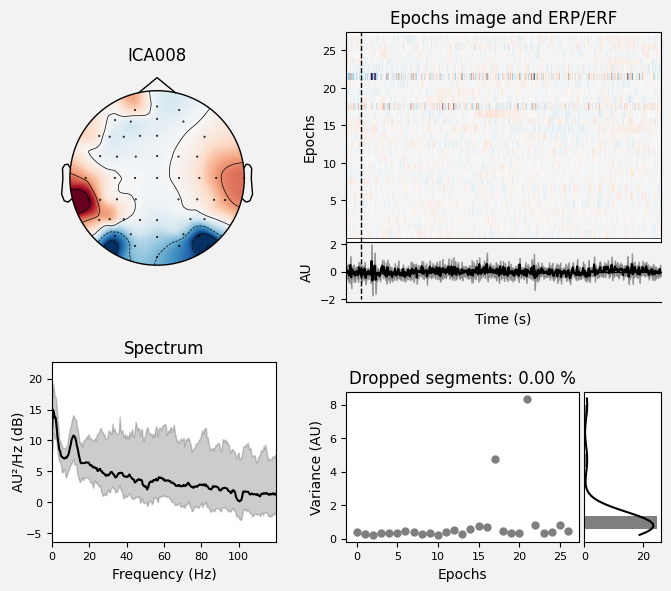

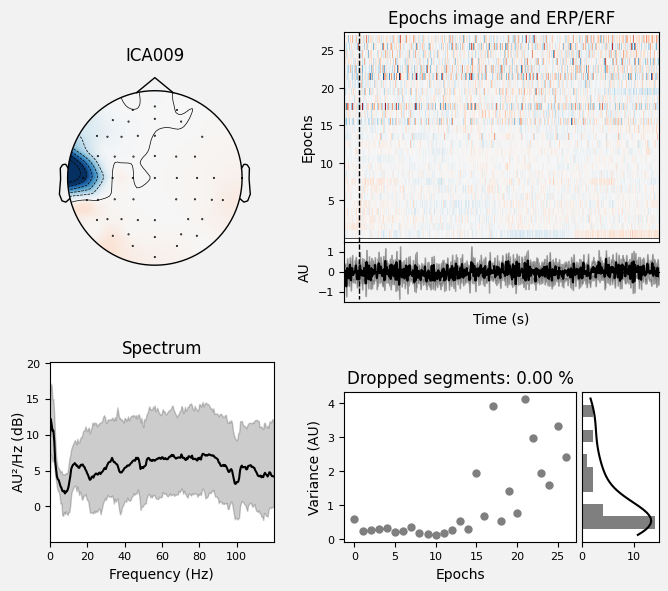

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [46]:
ica.plot_properties(
    epochs['left','rest'].copy().crop(-0.1,2).filter(1,120, verbose=False), 
    picks = [0,1,2,3,4,5,6,7,8,9], 
    log_scale = False,
    psd_args = dict(fmax=120))

In [47]:
eog_indices, eog_scores = ica.find_bads_eog(
    filtered['r_pinch'],
    ch_name=['EXG1','EXG2','EXG3','EXG4','EXG6','EXG8'], 
    measure='zscore',
    threshold=1.3)


Using EOG channels: EXG1, EXG2, EXG3, EXG4, EXG6, EXG8


In [48]:
eog_indices


[2, 1, 0, 8]

In [14]:
ecg_indices, icg_scores = ica.find_bads_ecg(filtered['r_pinch'], threshold=0.25)


C:\Users\Alberto\AppData\Local\Temp\ipykernel_6076\1950003828.py:1: RuntimeWarning: More than one ECG channel found. Using only EXG1.
  ecg_indices, icg_scores = ica.find_bads_ecg(filtered['r_pinch'], threshold=0.25)


In [15]:
ecg_indices


[0, 1, 7, 9, 3, 6, 5, 4, 8]

In [41]:
exclude = eog_indices + ecg_indices 
np.unique([0,1,2,3,4,6])

array([0, 1, 2, 5, 6])

In [49]:
ica.apply(epochs, exclude=[0,1,2,3,4,6,8,9])

Applying ICA to Epochs instance
    Transforming to ICA space (10 components)
    Zeroing out 8 ICA components
    Projecting back using 49 PCA components


<EpochsFIF |  74 events (all good), -2 - 7.99902 sec, baseline off, ~422.1 MB, data loaded,
 'r_pinch': 18
 'r_stop': 16
 'left': 16
 'right': 13
 'rest': 11>

ERP

Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



C:\Users\Alberto\AppData\Local\Temp\ipykernel_6076\3154141180.py:1: RuntimeWarning: filter_length (3381) is longer than the signal (3073), distortion is likely. Reduce filter length or filter a longer signal.
  epochs['left','right'].copy().crop(-1,2).filter(1,120, n_jobs=8).average().plot()
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1042 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 1856 out of 1856 | elapsed:    0.7s finished


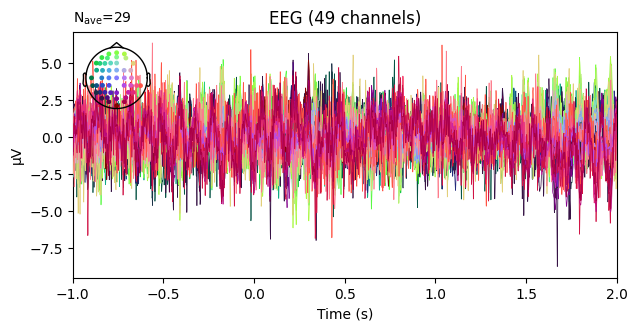

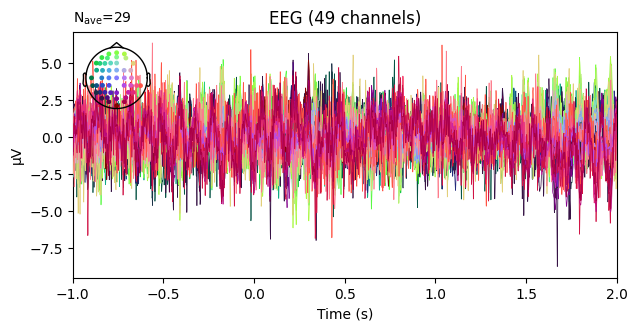

In [52]:
epochs['left','right'].copy().crop(-1,2).filter(1,120, n_jobs=8).average().plot()

Setting up band-pass filter from 2 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 1691 samples (1.651 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 536 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 704 out of 704 | elapsed:    0.3s finished


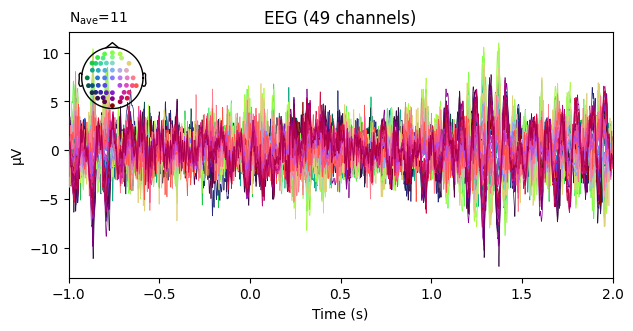

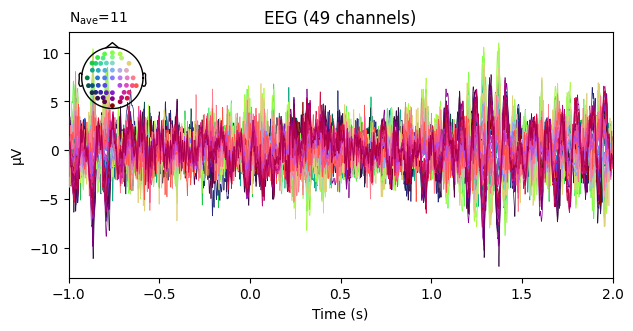

In [51]:
epochs['rest'].copy().crop(-1,2).filter(2,120, n_jobs=8).average().plot()

In [53]:
epochs.save('ica_epo.fif', overwrite=True)

Overwriting existing file.
